# FLEX

This notebook plots the Hovmoller diagrams of the simulated temperature in the [FLEX](https://gotm.net/cases/flex/) test case.

In [1]:
import sys
import numpy as np
import string
import matplotlib.pyplot as plt
sys.path.append("../gotmtool")
from gotmtool import *
from gotmtool.diags import get_mld_deltaT

## Load data

First, store the information of the five simulations into lists and dictionaries. 

In [2]:
casenames = [
    'KPP-CVMix',
    'KPPLT-VR12',
    'KPPLT-LF17',
    'GLS-C01A',
    'GLS-C01A_tidal',
    ]

casedir = '../gotm/run/FLEX'
save_fig = True

Load data into a dictionary.

In [3]:
sims = {}
dataset = {}
for case in casenames:
    sim = Simulation(path=casedir+'/'+case)
    sims[case] = sim
    dataset[case] = sim.load_data()

# Figure

Hovmoller diagrams comparing the observed and simulated temperature between the four vertical mixing schemes, and with and without tidal forcing in GLS-C01A.

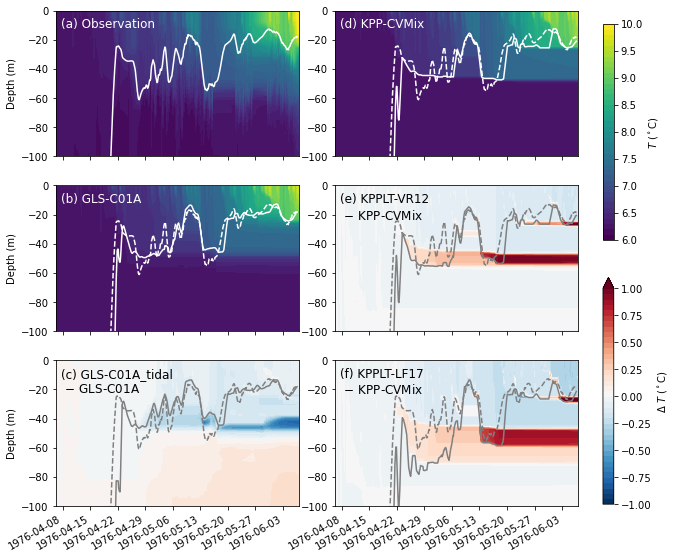

In [4]:
fig, axarr = plt.subplots(3,2, sharex='col')
fig.set_size_inches([10,8])

levels = np.linspace(6, 10, 41)
data = dataset['KPP-CVMix'].temp_obs[:,:,0,0]
mld_obs = -get_mld_deltaT(data)
im = data.plot.contourf(ax=axarr[0,0], levels=levels, add_colorbar=False)
mld_obs.rolling(time=8, center=True).mean().plot(
    ax=axarr[0,0], color='w', linewidth=1.5)
data0 = dataset['KPP-CVMix'].temp[:,:,0,0]
im0 = data0.plot.contourf(ax=axarr[0,1], levels=levels, add_colorbar=False)
mld_obs.rolling(time=8, center=True).mean().plot(
    ax=axarr[0,1], color='w', linestyle='--', linewidth=1.5)
mld0 = -get_mld_deltaT(data0)
mld0.rolling(time=8, center=True).mean().plot(
    ax=axarr[0,1], color='w', linestyle='-', linewidth=1.5)

levels_diff = np.linspace(-1, 1, 41)

labels = ['Observation', 'GLS-C01A']
data1 = dataset['GLS-C01A'].temp[:,:,0,0]
im1 = data1.plot.contourf(ax=axarr[1,0], levels=levels, add_colorbar=False)
mld_obs.rolling(time=8, center=True).mean().plot(
    ax=axarr[1,0], color='w', linestyle='--', linewidth=1.5)
mld1 = -get_mld_deltaT(data1)
mld1.rolling(time=8, center=True).mean().plot(
    ax=axarr[1,0], color='w', linestyle='-', linewidth=1.5)

j = 1
for case in ['GLS-C01A_tidal']:
    j += 1
    data2 = dataset[case].temp[:,:,0,0]
    diff = data2 - data1
    diff.attrs['long_name'] = '$\Delta$ '+ data1.attrs['long_name']
    diff.attrs['units'] = data1.attrs['units']
    im1 = diff.plot.contourf(ax=axarr[j,0], levels=levels_diff, add_colorbar=False)
    labels.append(case+'\n $-$ GLS-C01A')
    mld_obs.rolling(time=8, center=True).mean().plot(
        ax=axarr[j,0], color='gray', linestyle='--', linewidth=1.5)
    mld1 = -get_mld_deltaT(data2)
    mld1.rolling(time=8, center=True).mean().plot(
        ax=axarr[j,0], color='gray', linestyle='-', linewidth=1.5)

j = 0
labels.append('KPP-CVMix')
for case in ['KPPLT-VR12', 'KPPLT-LF17']:
    j += 1
    data1 = dataset[case].temp[:,:,0,0]
    diff = data1 - data0
    diff.attrs['long_name'] = '$\Delta$ '+ data0.attrs['long_name']
    diff.attrs['units'] = data0.attrs['units']
    im1 = diff.plot.contourf(ax=axarr[j,1], levels=levels_diff, add_colorbar=False)
    labels.append(case+'\n $-$ KPP-CVMix')
    mld_obs.rolling(time=8, center=True).mean().plot(
        ax=axarr[j,1], color='gray', linestyle='--', linewidth=1.5)
    mld1 = -get_mld_deltaT(data1)
    mld1.rolling(time=8, center=True).mean().plot(
        ax=axarr[j,1], color='gray', linestyle='-', linewidth=1.5)

colors = ['w', 'w', 'k', 'w', 'k', 'k']
for j in np.arange(3):
    for i in np.arange(2):
        k = i*3+j
        ax = axarr[j,i]
        ax.set_ylim([-100,0])
        ax.set_xlabel('')
        ax.set_title('')
        ax.set_xticks([np.datetime64('1976-04-08'),
                       np.datetime64('1976-04-15'),
                       np.datetime64('1976-04-22'),
                       np.datetime64('1976-04-29'),
                       np.datetime64('1976-05-06'),
                       np.datetime64('1976-05-13'),
                       np.datetime64('1976-05-20'),
                       np.datetime64('1976-05-27'),
                       np.datetime64('1976-06-03'),
                      ])
        if i == 0:
            ax.set_ylabel('Depth (m)')
        else:
            ax.set_ylabel('')
        ax.text(0.02, 0.95, '('+string.ascii_lowercase[k]+') '+labels[k],
                transform=ax.transAxes, fontsize=12, color=colors[k],
                va='top', ha='left')
    
plt.subplots_adjust(top=0.96, bottom=0.1, right=0.85, hspace=0.2, wspace=0.15)

label_str = '$T$ ($^\circ$C)'
cax0 = plt.axes([0.8, 0.55, 0.1, 0.4])
cax0.set_visible(False)
cb0 = plt.colorbar(im0, ax=cax0)
cb0.formatter.set_powerlimits((-2, 2)) 
cb0.update_ticks()
cb0.set_label(label_str)
cax1 = plt.axes([0.8, 0.1, 0.1, 0.4])
cax1.set_visible(False)
cb1 = plt.colorbar(im1, ax=cax1)
cb1.formatter.set_powerlimits((-2, 2)) 
cb1.update_ticks()
cb1.set_label(r'$\Delta$ '+label_str)

if save_fig:
    figname = 'flex_hovmoller.pdf'
    fig.savefig(figname, dpi=300)